In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from src.logger import logging
warnings.filterwarnings("ignore")

In [156]:
import os
print(os.getcwd())

e:\Vehicle_Insurance_project\EDA


In [157]:
# pd.read_csv("notebooks/data (1).csv")
df=pd.read_csv("../notebooks/data (1).csv",nrows=2000)

In [158]:
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


d: Unique ID for the customer
Gender: Gender of the customer
Age: Age of the customer
Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
Region_Code: Unique code for the region of the customer
Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
Vehicle_Age: Age of the Vehicle
Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
Annual_Premium: The amount customer needs to pay as premium in the year
Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
Vintage: Number of Days, Customer has been associated with the company
Response: [1 : Customer is interested, 0 : Customer is not interested]

In [159]:
df.shape

(2000, 12)

In [160]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [161]:
df.duplicated().sum()

np.int64(0)

Thus their are no duplicated and the null values in the Data

In [162]:
df["Response"].value_counts(normalize=True)*100

Response
0    87.4
1    12.6
Name: proportion, dtype: float64

**Countplot between responses**

[2025-10-23 23:03:57,459 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2025-10-23 23:03:57,471 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


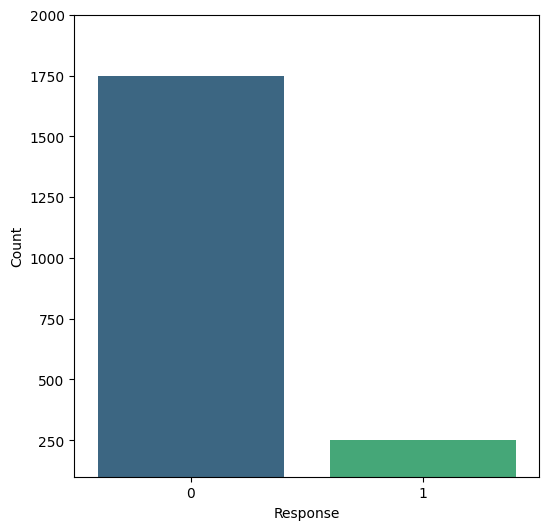

In [163]:
plt.figure(figsize=(6,6))
sns.countplot(x="Response",data=df,palette='viridis')
plt.ylim(100,2000)
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

Thus from the above analysis most of the people is getting rejected from giving the insurance aroing 88 percent of the people are rejected

Univariate analysis between the Gender and the Response


(array([0, 1, 2, 3]),
 [Text(0, 0, '(Female, 0)'),
  Text(1, 0, '(Female, 1)'),
  Text(2, 0, '(Male, 0)'),
  Text(3, 0, '(Male, 1)')])

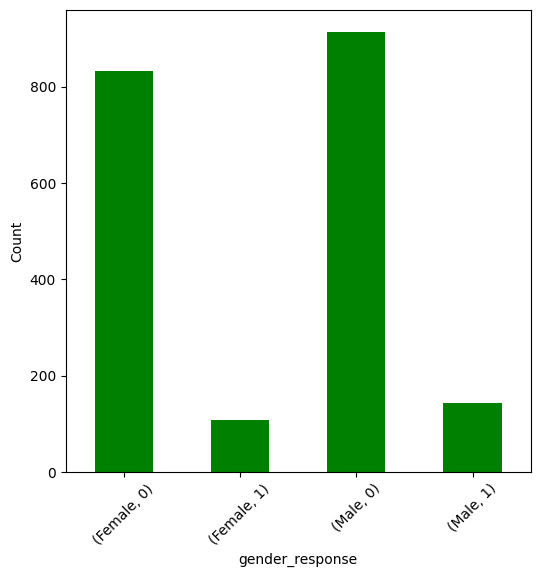

In [164]:
plt.figure(figsize=(6,6))
df.groupby(["Gender","Response"])["id"].count().plot(kind='bar',color='green')
plt.xlabel("gender_response")
plt.ylabel("Count")
plt.xticks(rotation=45)

From the above analysis the males get more vehicle insurance than females

Analysis of the age distribution

Text(0, 0.5, 'Count')

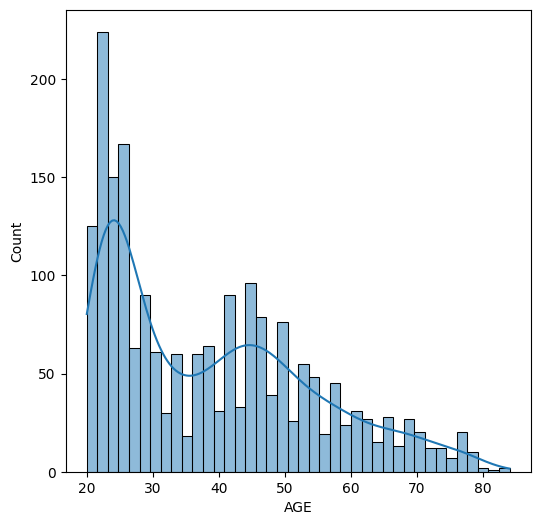

In [165]:
plt.figure(figsize=(6,6))
sns.histplot(x="Age",data=df,palette='viridis',kde=True,bins=40)
plt.xlabel("AGE")
plt.ylabel("Count")

**From the above data we have anlysized that**



1 The data is not following the normal distribution 
2 The data is gettting right skewed
3 The maximum people that applied for the vehicle insurance is belongs to the agegroup of the 20-30
4 The minimim people that applied for the vehicle insurance is belongs to the agegroup of the 70-80


**Driving License VS Gender**

[2025-10-23 23:03:58,001 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


[2025-10-23 23:03:58,013 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


Text(0, 0.5, 'Count')

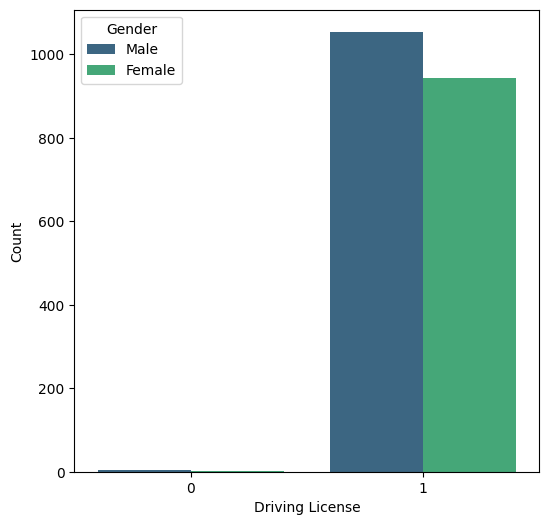

In [166]:
plt.figure(figsize=(6,6))
sns.countplot(x="Driving_License",data=df,hue="Gender",palette='viridis')
plt.xlabel("Driving License")
plt.ylabel("Count")

**Analsysis of the number of the people which get previously insured**

[2025-10-23 23:03:58,189 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2025-10-23 23:03:58,202 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


Text(0, 0.5, 'Count')

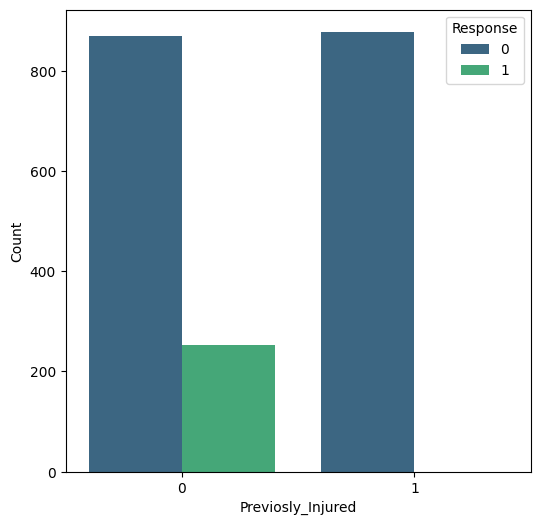

In [167]:
plt.figure(figsize=(6,6))
sns.countplot(x="Previously_Insured",data=df,palette='viridis',hue='Response')

plt.xlabel("Previosly_Injured")
plt.ylabel("Count")


Analysis of the Vehicle Age 

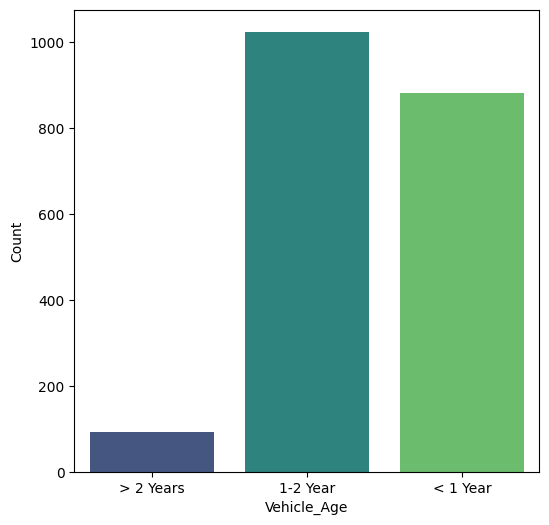

In [168]:
plt.figure(figsize=(6,6))
sns.countplot(x="Vehicle_Age",data=df,palette='viridis')
plt.xlabel("Vehicle_Age")
plt.ylabel("Count")
plt.show()

From the above analsysis the vehcicel havinbg age 1-2 are maximum applied for the insurance

Multivarite analysis of the Vehcile and the Response

Text(0, 0.5, 'Count')

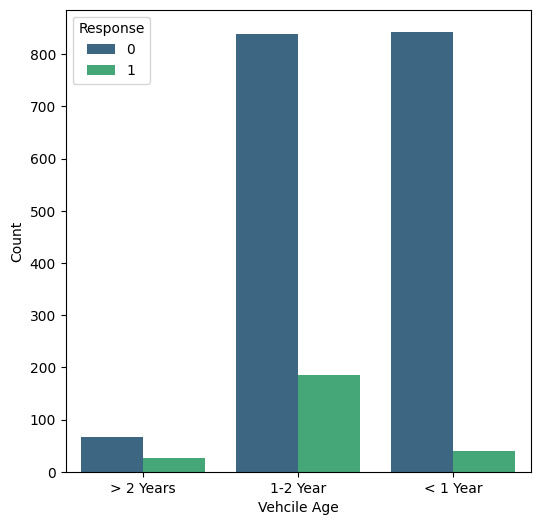

In [169]:
plt.figure(figsize=(6,6))
sns.countplot(x="Vehicle_Age",data=df,hue='Response',palette='viridis')
plt.xlabel("Vehcile Age")
plt.ylabel("Count")


**From the above analysis the vehicle age 1-2 year get Insurance easily**

**Multivariate Analysis of the VehicleDamage and the Response **

[2025-10-23 23:03:58,819 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2025-10-23 23:03:58,827 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


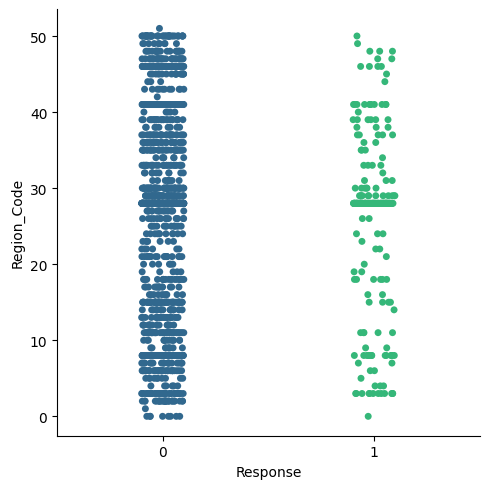

In [170]:
sns.catplot(x="Response",y="Region_Code",data=df,palette='viridis')

Text(0, 0.5, 'Count')

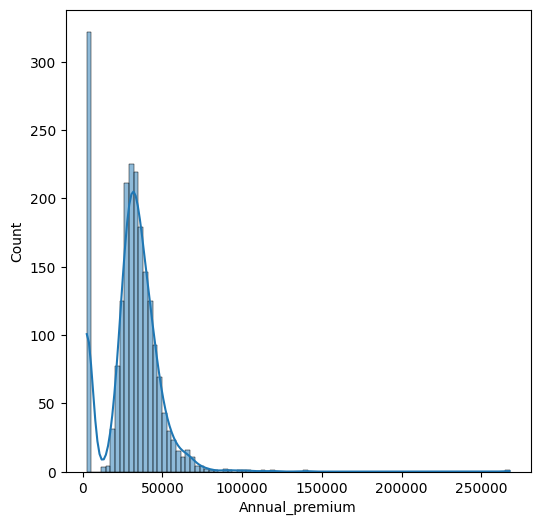

In [171]:
plt.figure(figsize=(6,6))
sns.histplot(x="Annual_Premium",data=df,palette='viridis',kde=True)
plt.xlabel("Annual_premium")
plt.ylabel("Count")

** From thr above analysis the most of the people are intersted in the annual premium of taking 5000 **

** Outliers Detection **

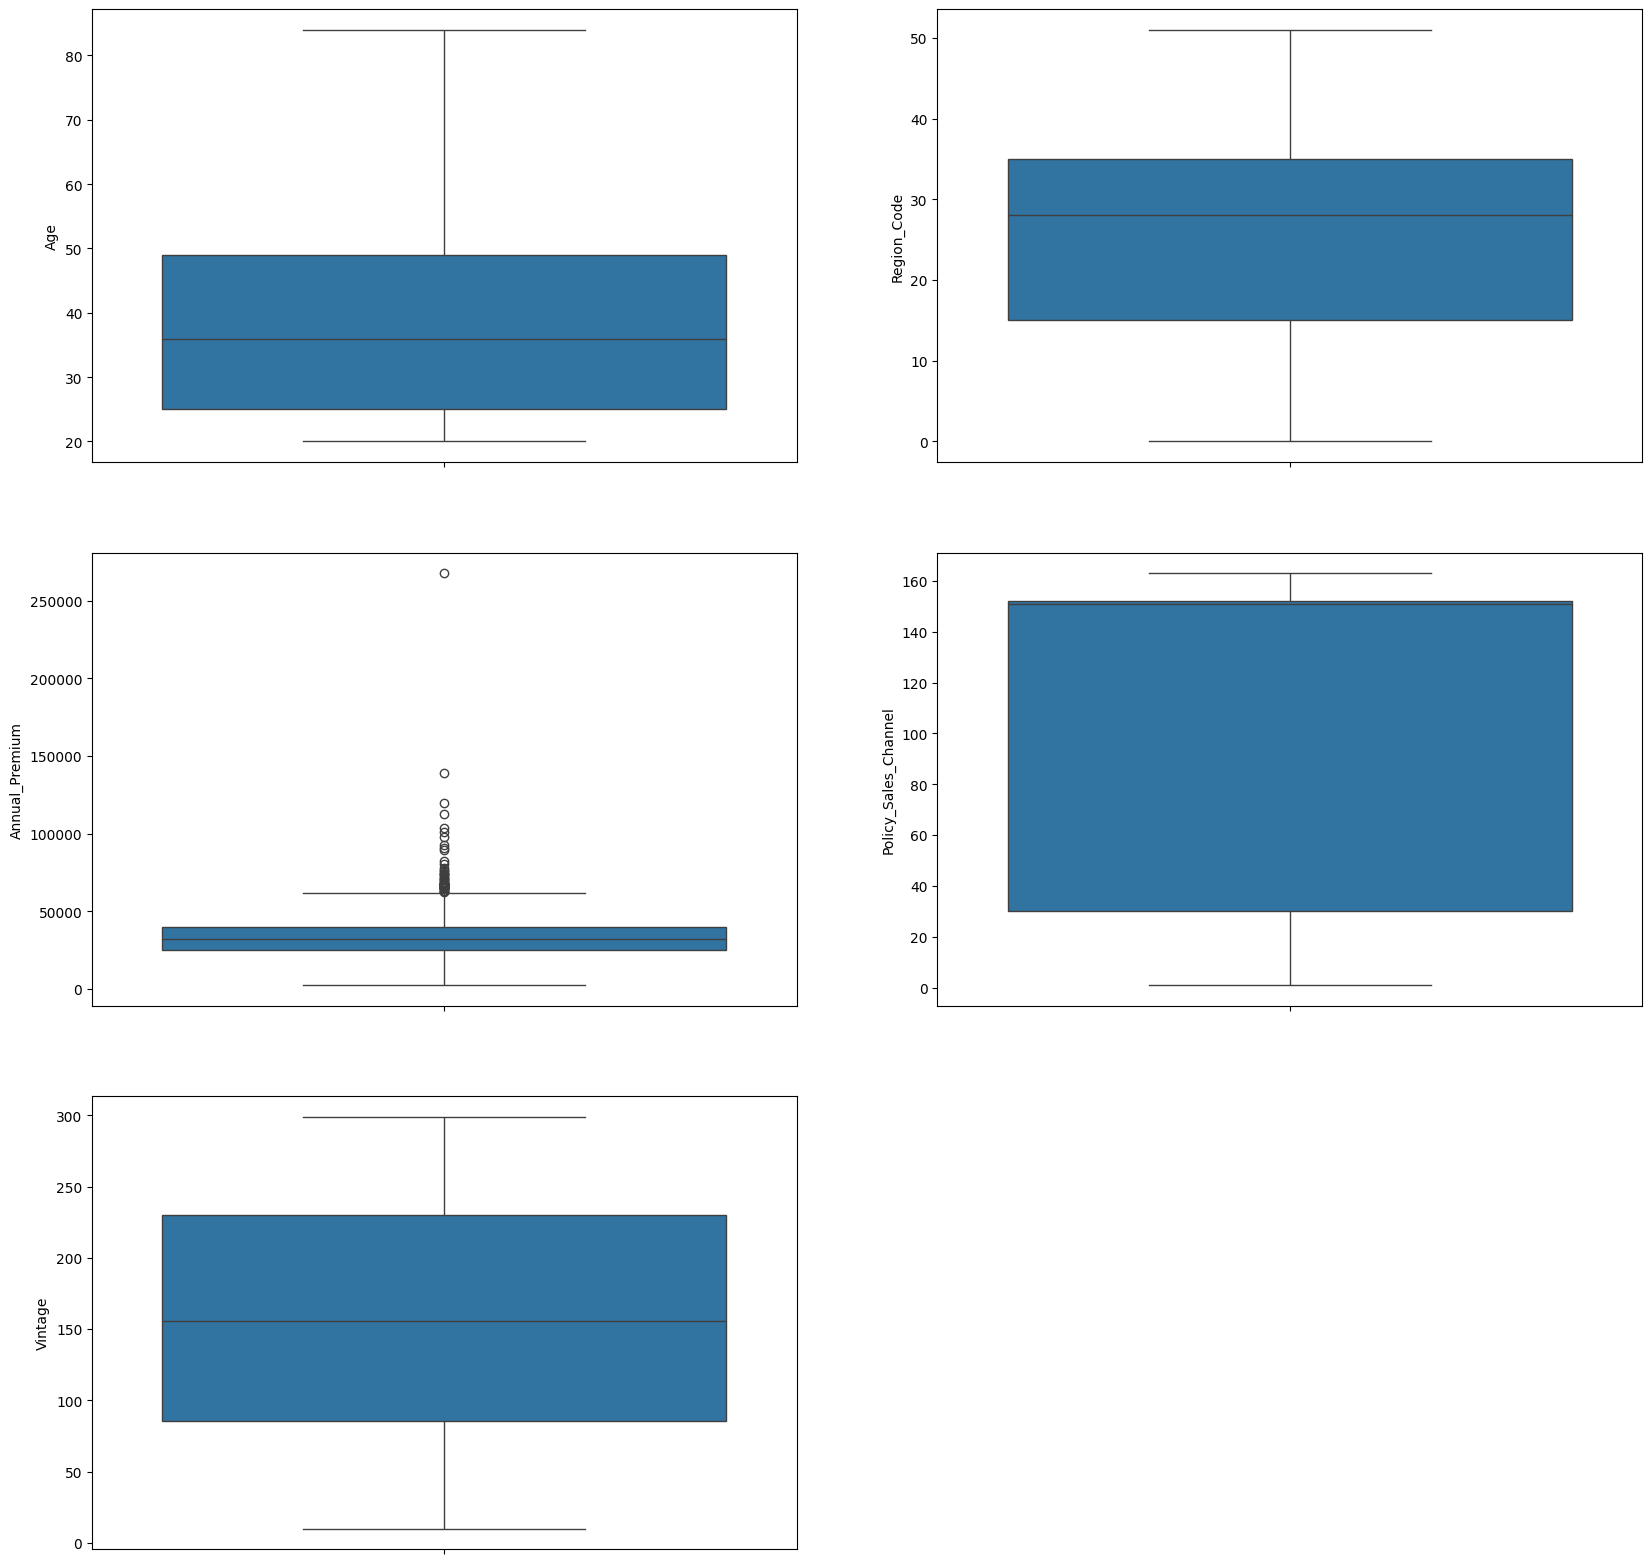

In [172]:
num_col=["Age","Region_Code","Annual_Premium","Policy_Sales_Channel","Vintage"]
plt.figure(figsize=(20,20))
for val in range(len(num_col)):
    plt.subplot(3,2,val+1)
    sns.boxplot(y=num_col[val],data=df)

**Thus from the above analysisis the Annual Premium columns basically consisits of the lot of the outliers**

Multivarite analyis of the all numerical columns

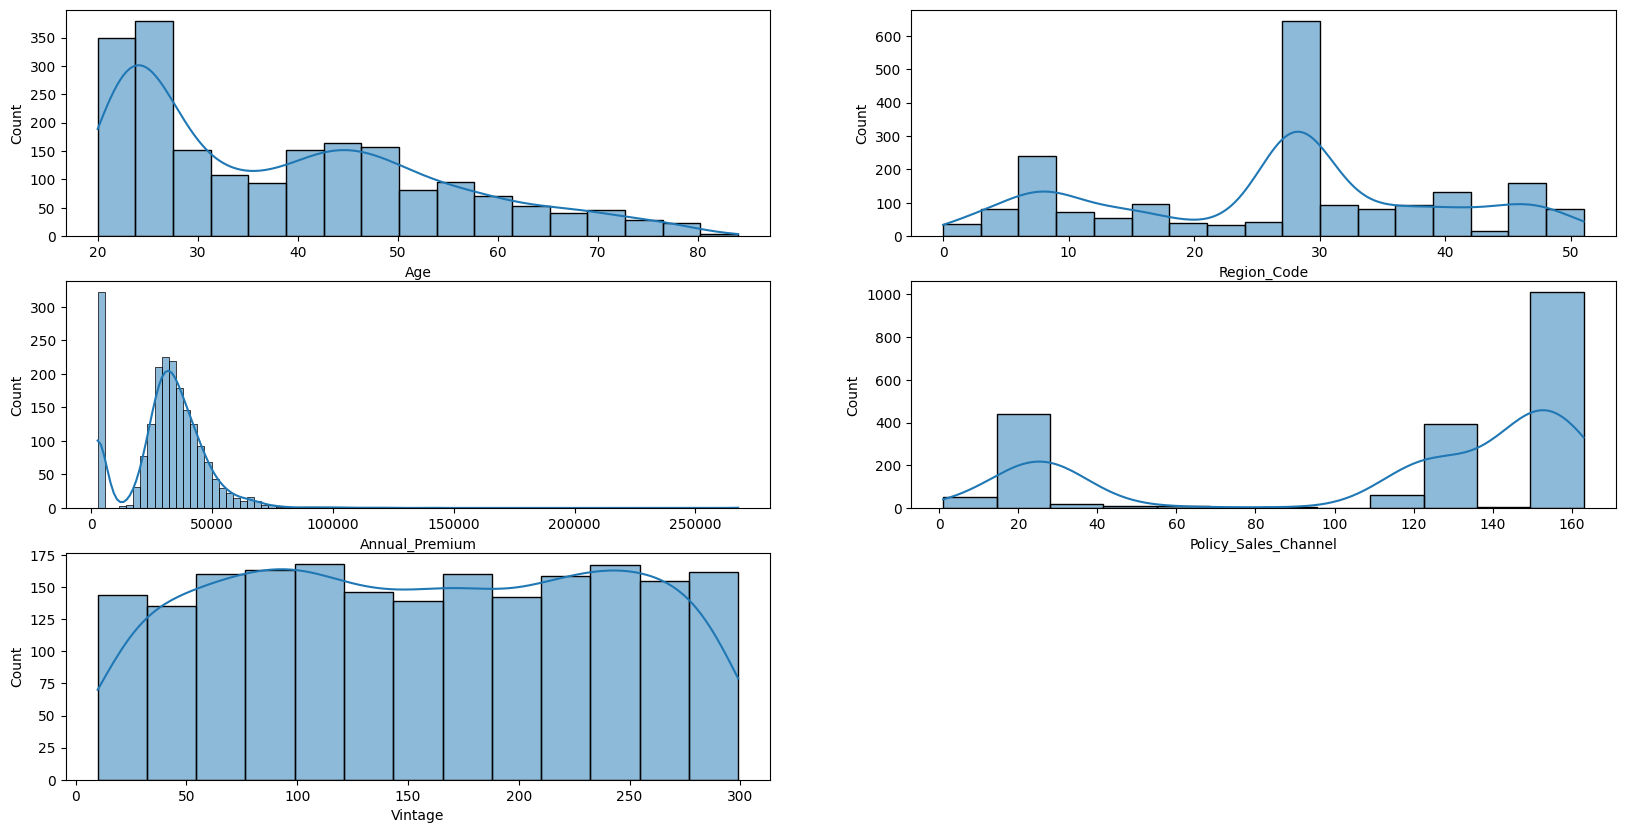

In [173]:
plt.figure(figsize=(20,10))
for val in range(len(num_col)):
    plt.subplot(3,2,val+1)
    sns.histplot(x=num_col[val],data=df,palette='viridis',kde=True)


[2025-10-23 23:04:01,245 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2025-10-23 23:04:01,254 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2025-10-23 23:04:01,289 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2025-10-23 23:04:01,303 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]


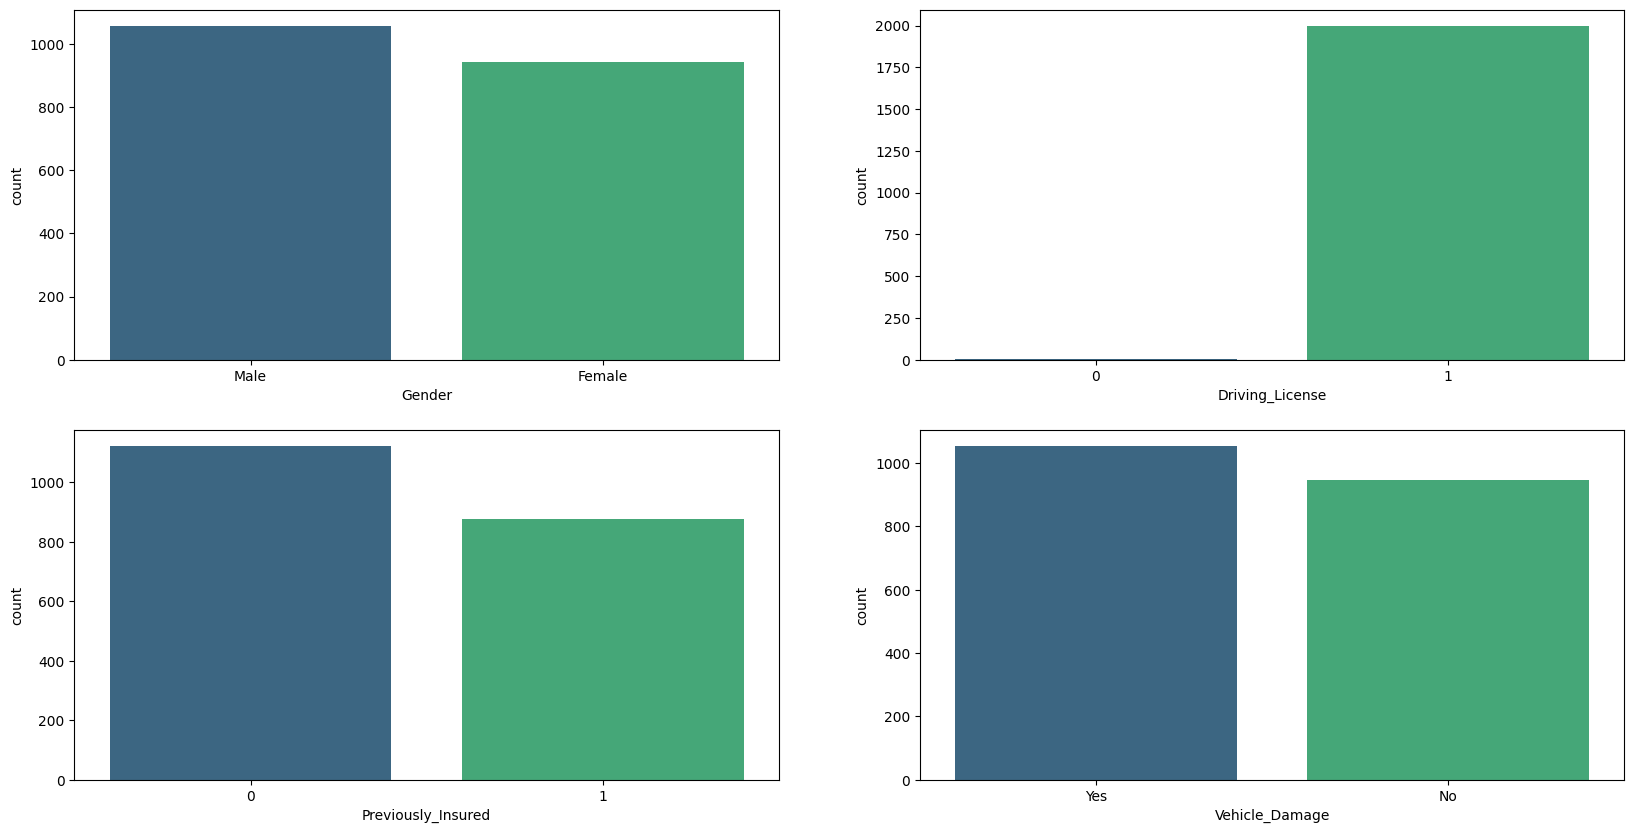

In [174]:
cat_col=["Gender","Driving_License","Previously_Insured","Vehicle_Damage"]
plt.figure(figsize=(20,10))
for val in range(len(cat_col)):
    plt.subplot(2,2,val+1)
    sns.countplot(x=cat_col[val],data=df,palette='viridis')

**Thus the Id column is no use so we should remove it**

In [175]:
df.drop("id",axis=1,inplace=True)

In [176]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Tranforming the textual columns into to the numerical column

**Gender**

In [177]:
from sklearn.preprocessing import OrdinalEncoder

In [178]:
ord=OrdinalEncoder()
df["Gender"]=ord.fit_transform(df[["Gender"]])
df["Vehicle_Damage"]=ord.fit_transform(df[["Vehicle_Damage"]])


In [179]:
df["Vehicle_Age"]=df["Vehicle_Age"].map(
    {
        '1-2 Year':1.5,
        '< 1 Year':1,
        '> 2 Years':2

    }
)

In [180]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.0,44,1,28.0,0,2.0,1.0,40454.0,26.0,217,1
1,1.0,76,1,3.0,0,1.5,0.0,33536.0,26.0,183,0
2,1.0,47,1,28.0,0,2.0,1.0,38294.0,26.0,27,1
3,1.0,21,1,11.0,1,1.0,0.0,28619.0,152.0,203,0
4,0.0,29,1,41.0,1,1.0,0.0,27496.0,152.0,39,0


MultiCollinerity

In [181]:
df1=df.copy()
df1.drop("Response",axis=1,inplace=True)

[2025-10-23 23:04:01,860 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x000001E3B9958F50>]


<Axes: >

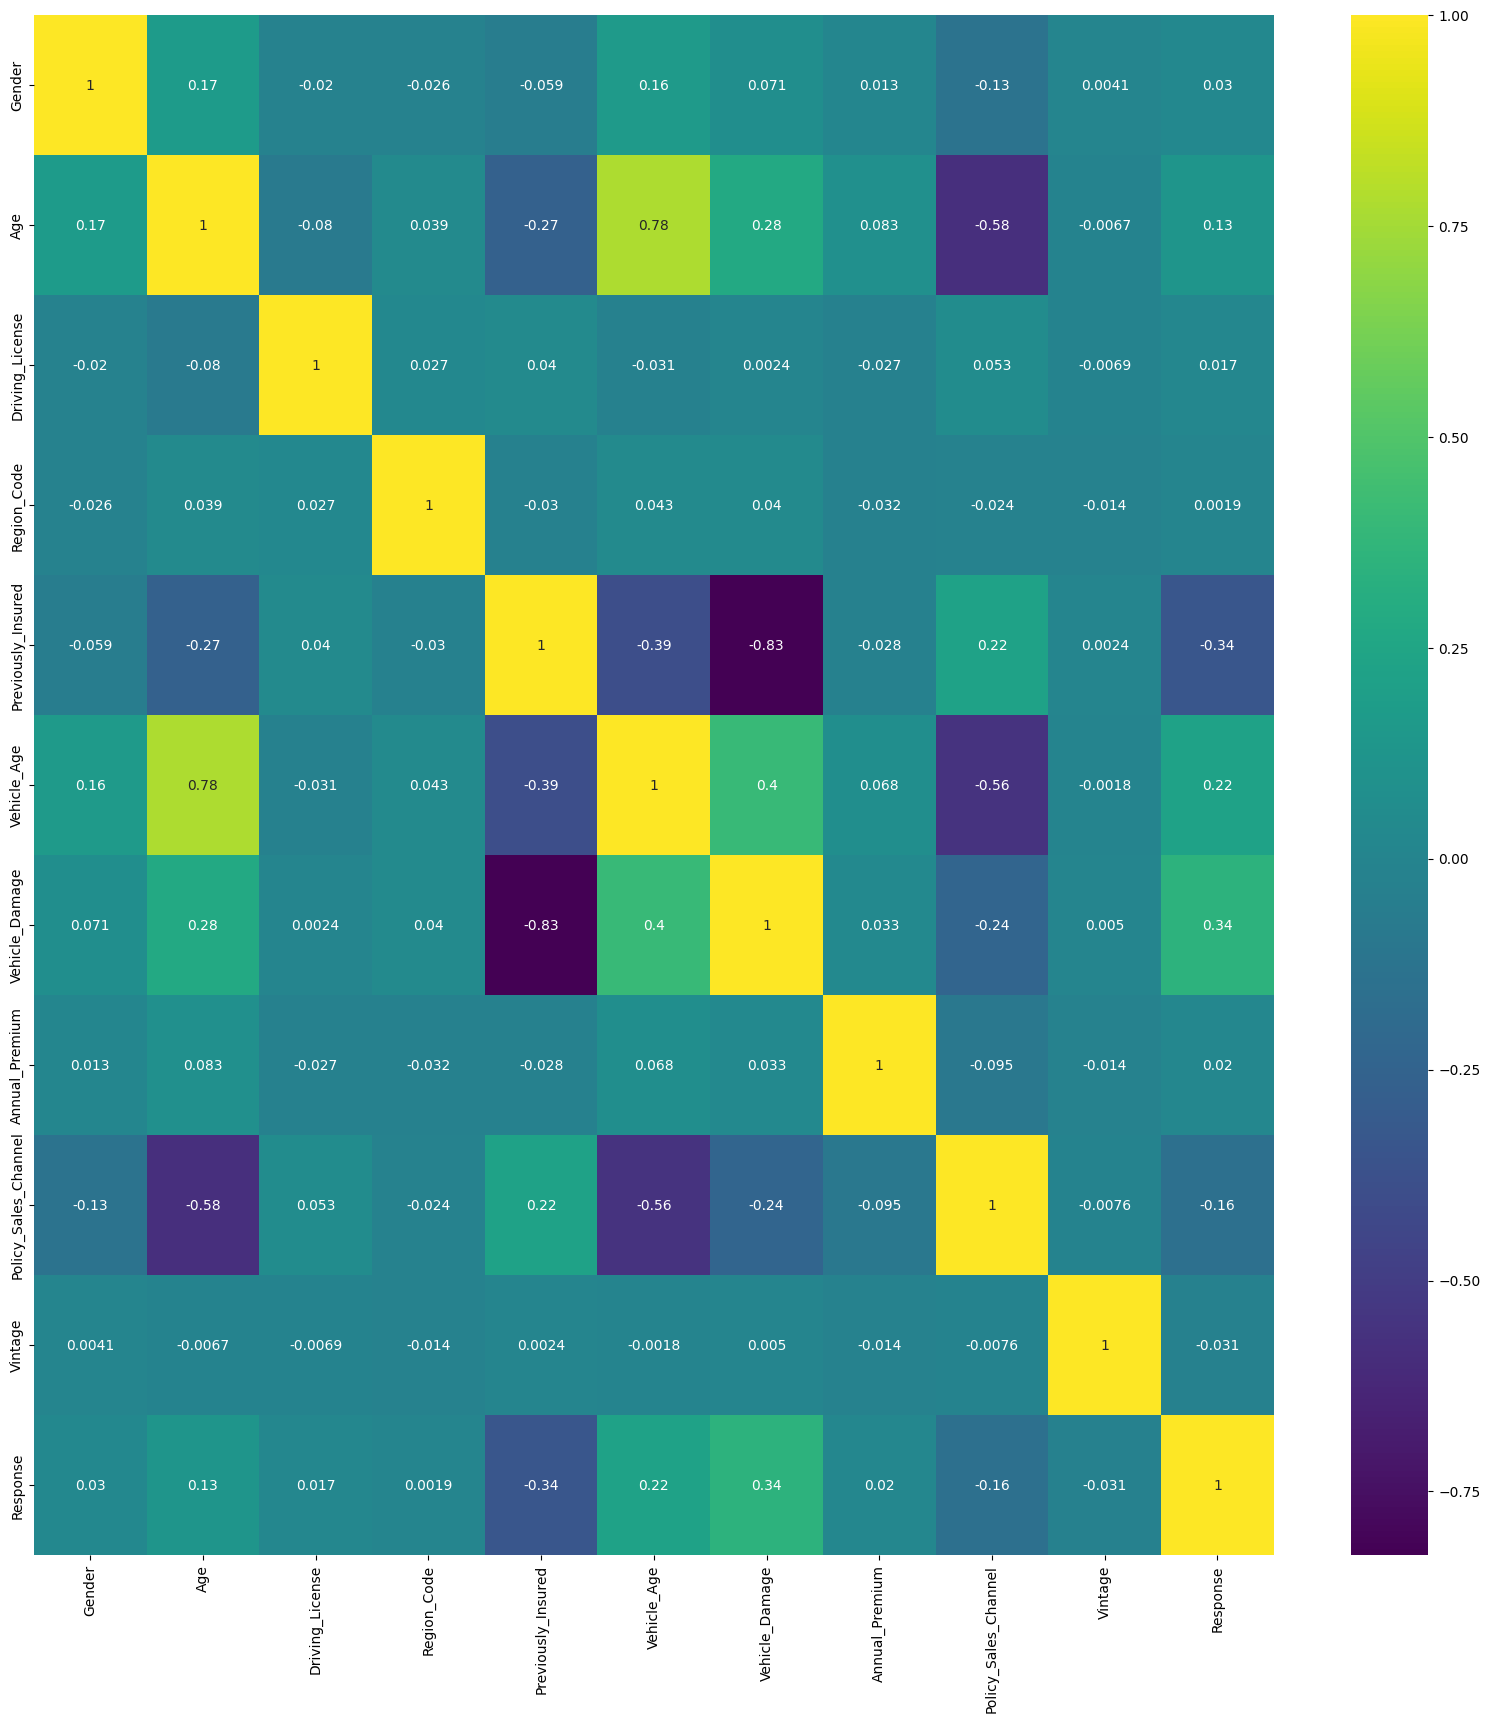

In [182]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

**From the above analysis the vehicel age and the age have thenhigh correlation between them**